In [139]:
import tensorflow as tf
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as pyplt

In [140]:
#Read Data
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


**Turn Categorical Data Into One Hot Encoding **

**preprocessing the data**

In [141]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),
    (OneHotEncoder(handle_unknown="ignore"), ["sex","smoker","region"]))



In [142]:

X = insurance.drop("charges",axis=1)
Y = insurance["charges"]





**prepare the `Three Sets`**

In [143]:
from scipy.sparse import random
#Create training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [144]:
#Fit the column transformer to our training data
ct.fit(X_train)
#Transform training and test data with normalization
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

**Build RNN**

In [145]:
tf.random.set_seed(42)
insurance_model = tf.keras.Sequential()
insurance_model.add(tf.keras.layers.Dense(100))
insurance_model.add(tf.keras.layers.Dense(10))
insurance_model.add(tf.keras.layers.Dense(1))

insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                        metrics=["mae"])

history = insurance_model.fit(X_train_normal, Y_train, epochs=100, verbose=1)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13220.5508 - mae: 13220.5508
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 11376.0615 - mae: 11376.0615
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 8117.7974 - mae: 8117.7974
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 7597.3877 - mae: 7597.3877
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 7112.2817 - mae: 7112.2817
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 6527.2578 - mae: 6527.2578
Epoch 7/100
34/34 [==============================] - 0s 10ms/step - loss: 5614.2432 - mae: 5614.2432
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 4463.2188 - mae: 4463.2188
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 3756.8032 - mae: 3756.8032
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 3677.3540 - mae: 3677

In [146]:
insurance_model.evaluate(X_test_normal,Y_test)

9/9 [==============================] - 0s 1ms/step - loss: 3178.4592 - mae: 3178.4592


[3178.459228515625, 3178.459228515625]

Text(0.5, 0, 'epochs')

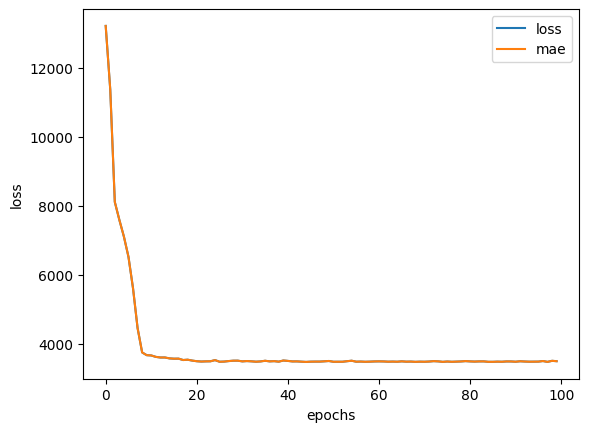

In [147]:

pd.DataFrame(history.history).plot()
pyplt.ylabel("loss")
pyplt.xlabel("epochs")